In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_dataVF.csv')

In [3]:
df.columns

Index(['Prix', 'year', 'origin', 'firstCirculationDate', 'firstHand', 'energy',
       'gearbox', 'externalColor', 'doors', 'critAir', 'owners',
       'mileage_value', 'co2_value', 'powerDIN_value',
       'ratedHorsePower_value'],
      dtype='object')

In [4]:
# Explore the first few rows of the DataFrame
df.head()

,Prix,year,origin,firstCirculationDate,firstHand,energy,gearbox,externalColor,doors,critAir,owners,mileage_value,co2_value,powerDIN_value,ratedHorsePower_value
0,21490.0,2019,France,2019-06-27,Non,Essence,Manuelle,blanc opaque (verni sans reflet),5.0,1,2.0,50760,132,109,6
1,19860.0,2021,France,2021-12-29,Oui,Diesel,Manuelle,noir,5.0,2,2.0,62362,136,116,6
2,40420.0,2022,France,2022-09-22,Oui,Hybride essence électrique,Automatique,rouge metal,5.0,1,2.0,38325,31,180,10
3,35930.0,2023,Importé,2023-11-18,Non,Essence,Automatique,bleu,5.0,1,2.0,15450,151,130,7
4,25060.0,2017,France,2017-07-04,Oui,Diesel,Automatique,noir,5.0,2,2.0,157776,125,150,8


In [5]:
# Check for missing values
print(df.isnull().sum())

Prix                     0
year                     0
origin                   0
firstCirculationDate     0
firstHand                0
energy                   0
gearbox                  0
externalColor            0
doors                    0
critAir                  0
owners                   0
mileage_value            0
co2_value                0
powerDIN_value           0
ratedHorsePower_value    0
dtype: int64


In [6]:
# Check for duplicates
print(df.duplicated().sum())

11


In [7]:
# Summary statistics for numerical columns
print(df.describe())

                Prix         year        doors      critAir       owners  \
count    1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    39913.632735  2019.831005     4.604790     1.351963     2.141051   
std     44768.661563     4.375750     0.913446     0.578586     0.924621   
min      4710.000000  1966.000000     2.000000     0.000000     1.000000   
25%     20260.000000  2019.000000     5.000000     1.000000     2.000000   
50%     28840.000000  2020.000000     5.000000     1.000000     2.000000   
75%     39705.000000  2022.000000     5.000000     2.000000     2.000000   
max    678180.000000  2024.000000     5.000000     5.000000     9.000000   

       mileage_value    co2_value  powerDIN_value  ratedHorsePower_value  
count    1503.000000  1503.000000     1503.000000            1503.000000  
mean    58690.200931   129.808383      167.322688               9.832335  
std     46961.707244    51.157682      106.277657               8.999769  
min         1.0

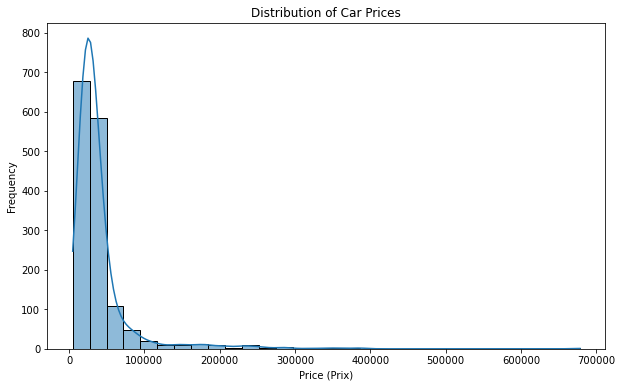

In [8]:
# Univariate Analysis
# Visualize the distribution of 'Prix' (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Prix'], bins=30, kde=True)
plt.xlabel('Price (Prix)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

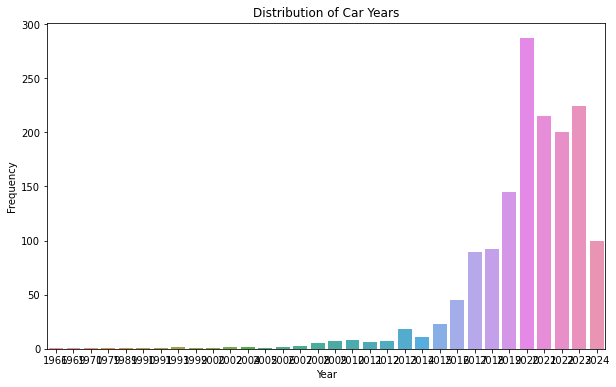

In [9]:
# Visualize the distribution of 'year'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Car Years')
plt.show()

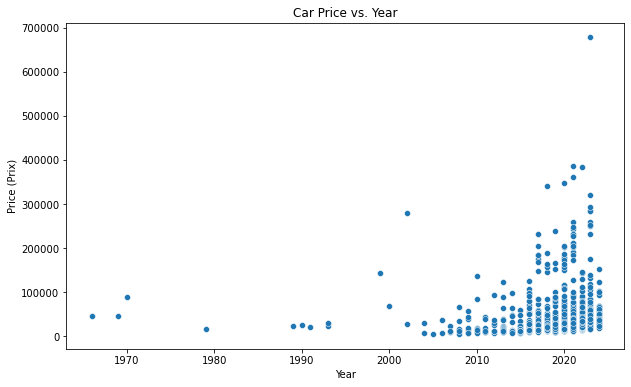

In [10]:
# Bivariate Analysis
# Visualize the relationship between 'Prix' and 'year'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='Prix')
plt.xlabel('Year')
plt.ylabel('Price (Prix)')
plt.title('Car Price vs. Year')
plt.show()

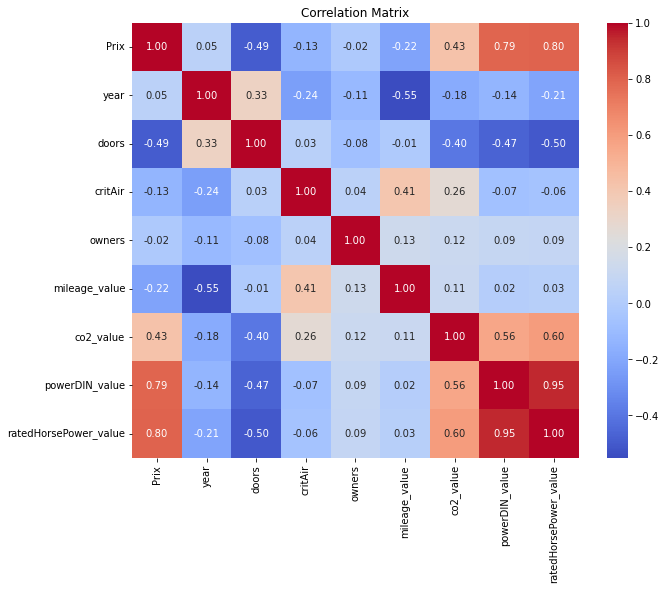

In [11]:
# Correlation Analysis (if you have numerical columns)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

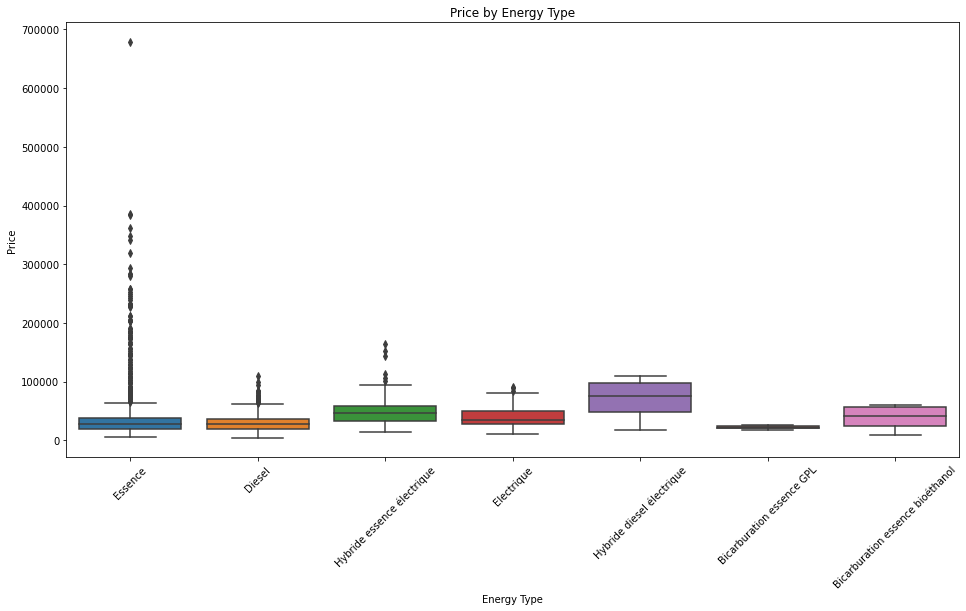

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='energy', y='Prix', data=df)
plt.xticks(rotation=45)
plt.xlabel('Energy Type')
plt.ylabel('Price')
plt.title('Price by Energy Type')
plt.show()

In [13]:
import numpy as np
import pandas as pd

# Assuming you have a DataFrame named 'df' and a column named 'feature' that you want to remove outliers from

# Calculate the mean and standard deviation of the 'feature' column (using the numeric_only parameter)
mean = df['Prix'].mean()
std = df['Prix'].std()

# Define the threshold for outliers (e.g., 3 standard deviations)
threshold = 3 * std

# Filter out the outliers by specifying the column 'feature' along which to apply the condition
df = df[np.abs(df['Prix'] - mean) < threshold]

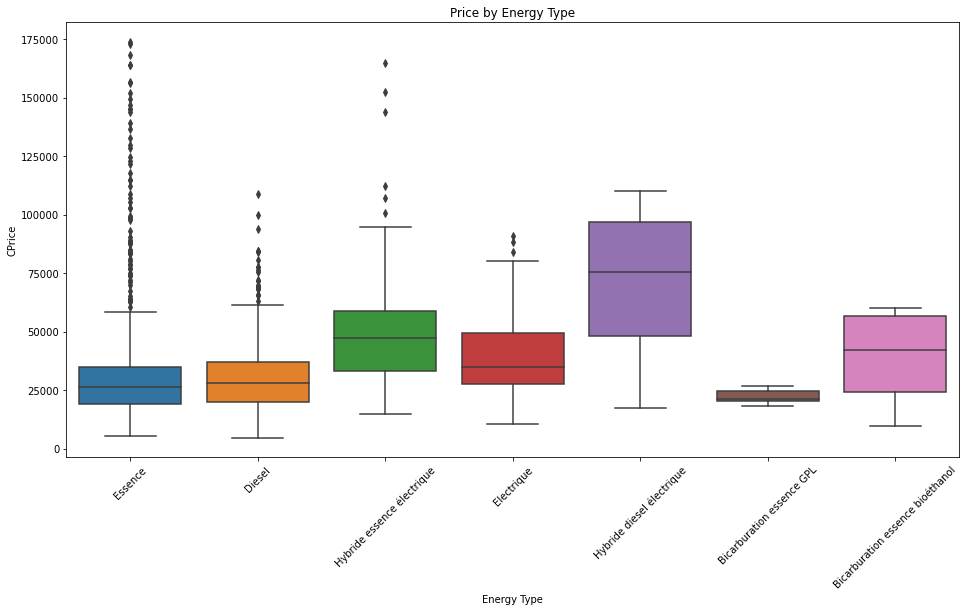

In [14]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='energy', y='Prix', data=df)
plt.xticks(rotation=45)
plt.xlabel('Energy Type')
plt.ylabel('CPrice')
plt.title('Price by Energy Type')
plt.show()

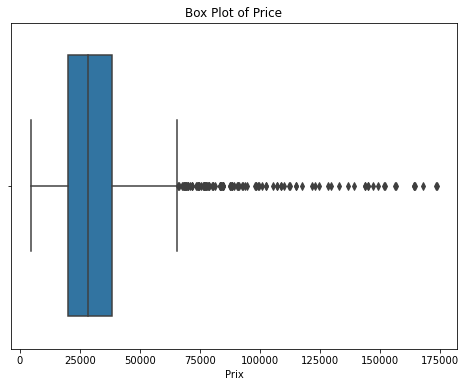

In [15]:
# Create the box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Prix'])
plt.xlabel('Prix')
plt.title('Box Plot of Price')
plt.show()

In [16]:
Q1 = df['Prix'].quantile(0.25)
Q3 = df['Prix'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers by keeping only the values within the bounds
df = df[(df['Prix'] >= lower_bound) & (df['Prix'] <= upper_bound)]

# Optionally, you can reset the index of the filtered DataFrame
df.reset_index(drop=True, inplace=True)

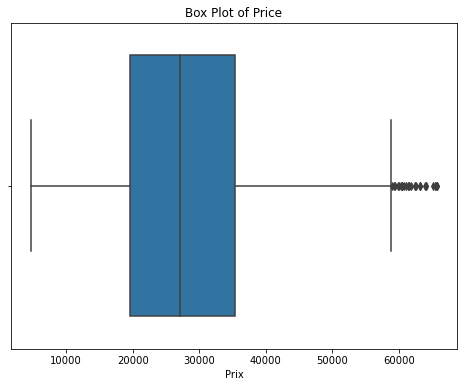

In [17]:
# Create the box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Prix'])
plt.xlabel('Prix')
plt.title('Box Plot of Price')
plt.show()

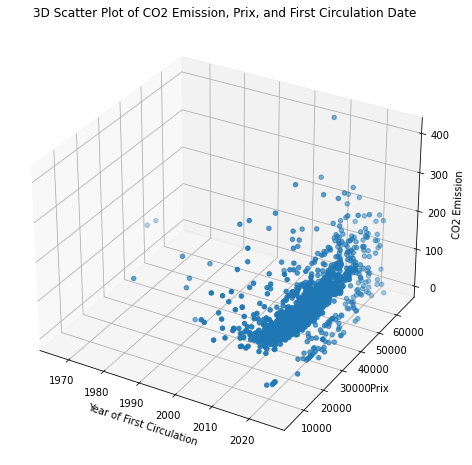

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract data for the plot
co2_emission = df['co2_value']
prix = df['Prix']
year = pd.to_datetime(df['firstCirculationDate']).dt.year

# Plot the 3D scatter plot
ax.scatter(year, prix, co2_emission)

# Set axis labels
ax.set_xlabel('Year of First Circulation')
ax.set_ylabel('Prix')
ax.set_zlabel('CO2 Emission')

plt.title('3D Scatter Plot of CO2 Emission, Prix, and First Circulation Date')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Prix                   1354 non-null   float64
 1   year                   1354 non-null   int64  
 2   origin                 1354 non-null   object 
 3   firstCirculationDate   1354 non-null   object 
 4   firstHand              1354 non-null   object 
 5   energy                 1354 non-null   object 
 6   gearbox                1354 non-null   object 
 7   externalColor          1354 non-null   object 
 8   doors                  1354 non-null   float64
 9   critAir                1354 non-null   int64  
 10  owners                 1354 non-null   float64
 11  mileage_value          1354 non-null   int64  
 12  co2_value              1354 non-null   int64  
 13  powerDIN_value         1354 non-null   int64  
 14  ratedHorsePower_value  1354 non-null   int64  
dtypes: f

# Data Preprocessing: convert categorical variables 
## energy, gearbox, origin, firsthand, externalColor

In [20]:
# One-hot encoding for 'energy'
df_energy_encoded = pd.get_dummies(df['energy'], prefix='is_energy')

# Concatenate the encoded DataFrame back to the original DataFrame
df = pd.concat([df, df_energy_encoded], axis=1)

# Drop the original 'energy' column as it's no longer needed
df.drop('energy', axis=1, inplace=True)

In [21]:
# Print the resulting DataFrame with the 'energy' column encoded
df.head()

,Prix,year,origin,firstCirculationDate,firstHand,gearbox,externalColor,doors,critAir,owners,...,co2_value,powerDIN_value,ratedHorsePower_value,is_energy_Bicarburation essence GPL,is_energy_Bicarburation essence bioéthanol,is_energy_Diesel,is_energy_Electrique,is_energy_Essence,is_energy_Hybride diesel électrique,is_energy_Hybride essence électrique
0,21490.0,2019,France,2019-06-27,Non,Manuelle,blanc opaque (verni sans reflet),5.0,1,2.0,...,132,109,6,0,0,0,0,1,0,0
1,19860.0,2021,France,2021-12-29,Oui,Manuelle,noir,5.0,2,2.0,...,136,116,6,0,0,1,0,0,0,0
2,40420.0,2022,France,2022-09-22,Oui,Automatique,rouge metal,5.0,1,2.0,...,31,180,10,0,0,0,0,0,0,1
3,35930.0,2023,Importé,2023-11-18,Non,Automatique,bleu,5.0,1,2.0,...,151,130,7,0,0,0,0,1,0,0
4,25060.0,2017,France,2017-07-04,Oui,Automatique,noir,5.0,2,2.0,...,125,150,8,0,0,1,0,0,0,0


In [22]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'gearbox'
le = LabelEncoder()
df['gearbox_encoded'] = le.fit_transform(df['gearbox'])

# Print the resulting DataFrame with the 'gearbox' column encoded
df.head()

,Prix,year,origin,firstCirculationDate,firstHand,gearbox,externalColor,doors,critAir,owners,...,powerDIN_value,ratedHorsePower_value,is_energy_Bicarburation essence GPL,is_energy_Bicarburation essence bioéthanol,is_energy_Diesel,is_energy_Electrique,is_energy_Essence,is_energy_Hybride diesel électrique,is_energy_Hybride essence électrique,gearbox_encoded
0,21490.0,2019,France,2019-06-27,Non,Manuelle,blanc opaque (verni sans reflet),5.0,1,2.0,...,109,6,0,0,0,0,1,0,0,1
1,19860.0,2021,France,2021-12-29,Oui,Manuelle,noir,5.0,2,2.0,...,116,6,0,0,1,0,0,0,0,1
2,40420.0,2022,France,2022-09-22,Oui,Automatique,rouge metal,5.0,1,2.0,...,180,10,0,0,0,0,0,0,1,0
3,35930.0,2023,Importé,2023-11-18,Non,Automatique,bleu,5.0,1,2.0,...,130,7,0,0,0,0,1,0,0,0
4,25060.0,2017,France,2017-07-04,Oui,Automatique,noir,5.0,2,2.0,...,150,8,0,0,1,0,0,0,0,0


In [23]:
# One-hot encoding for 'origin'
df_origin_encoded = pd.get_dummies(df['origin'], prefix='is_origin')

# Concatenate the encoded DataFrame back to the original DataFrame
df = pd.concat([df, df_origin_encoded], axis=1)

# Drop the original 'origin' column as it's no longer needed
df.drop('origin', axis=1, inplace=True)

# Print the resulting DataFrame with the 'origin' column encoded
df.head()

,Prix,year,firstCirculationDate,firstHand,gearbox,externalColor,doors,critAir,owners,mileage_value,...,is_energy_Bicarburation essence GPL,is_energy_Bicarburation essence bioéthanol,is_energy_Diesel,is_energy_Electrique,is_energy_Essence,is_energy_Hybride diesel électrique,is_energy_Hybride essence électrique,gearbox_encoded,is_origin_France,is_origin_Importé
0,21490.0,2019,2019-06-27,Non,Manuelle,blanc opaque (verni sans reflet),5.0,1,2.0,50760,...,0,0,0,0,1,0,0,1,1,0
1,19860.0,2021,2021-12-29,Oui,Manuelle,noir,5.0,2,2.0,62362,...,0,0,1,0,0,0,0,1,1,0
2,40420.0,2022,2022-09-22,Oui,Automatique,rouge metal,5.0,1,2.0,38325,...,0,0,0,0,0,0,1,0,1,0
3,35930.0,2023,2023-11-18,Non,Automatique,bleu,5.0,1,2.0,15450,...,0,0,0,0,1,0,0,0,0,1
4,25060.0,2017,2017-07-04,Oui,Automatique,noir,5.0,2,2.0,157776,...,0,0,1,0,0,0,0,0,1,0


In [24]:
# Label encoding for 'firstHand'
df['firstHand_encoded'] = le.fit_transform(df['firstHand'])

# Print the resulting DataFrame with the 'firstHand' column encoded
df.head()

,Prix,year,firstCirculationDate,firstHand,gearbox,externalColor,doors,critAir,owners,mileage_value,...,is_energy_Bicarburation essence bioéthanol,is_energy_Diesel,is_energy_Electrique,is_energy_Essence,is_energy_Hybride diesel électrique,is_energy_Hybride essence électrique,gearbox_encoded,is_origin_France,is_origin_Importé,firstHand_encoded
0,21490.0,2019,2019-06-27,Non,Manuelle,blanc opaque (verni sans reflet),5.0,1,2.0,50760,...,0,0,0,1,0,0,1,1,0,0
1,19860.0,2021,2021-12-29,Oui,Manuelle,noir,5.0,2,2.0,62362,...,0,1,0,0,0,0,1,1,0,1
2,40420.0,2022,2022-09-22,Oui,Automatique,rouge metal,5.0,1,2.0,38325,...,0,0,0,0,0,1,0,1,0,1
3,35930.0,2023,2023-11-18,Non,Automatique,bleu,5.0,1,2.0,15450,...,0,0,0,1,0,0,0,0,1,0
4,25060.0,2017,2017-07-04,Oui,Automatique,noir,5.0,2,2.0,157776,...,0,1,0,0,0,0,0,1,0,1


In [25]:
# Drop the original 'firstHand' column as it's no longer needed
df.drop('firstHand', axis=1, inplace=True)
df.drop('gearbox', axis=1, inplace=True)

In [26]:
df.head()

,Prix,year,firstCirculationDate,externalColor,doors,critAir,owners,mileage_value,co2_value,powerDIN_value,...,is_energy_Bicarburation essence bioéthanol,is_energy_Diesel,is_energy_Electrique,is_energy_Essence,is_energy_Hybride diesel électrique,is_energy_Hybride essence électrique,gearbox_encoded,is_origin_France,is_origin_Importé,firstHand_encoded
0,21490.0,2019,2019-06-27,blanc opaque (verni sans reflet),5.0,1,2.0,50760,132,109,...,0,0,0,1,0,0,1,1,0,0
1,19860.0,2021,2021-12-29,noir,5.0,2,2.0,62362,136,116,...,0,1,0,0,0,0,1,1,0,1
2,40420.0,2022,2022-09-22,rouge metal,5.0,1,2.0,38325,31,180,...,0,0,0,0,0,1,0,1,0,1
3,35930.0,2023,2023-11-18,bleu,5.0,1,2.0,15450,151,130,...,0,0,0,1,0,0,0,0,1,0
4,25060.0,2017,2017-07-04,noir,5.0,2,2.0,157776,125,150,...,0,1,0,0,0,0,0,1,0,1


In [27]:
# One-hot encoding for 'externalColor'
df_externalColor_encoded = pd.get_dummies(df['externalColor'], prefix='is_externalColor')

# Concatenate the encoded DataFrame back to the original DataFrame
df = pd.concat([df, df_externalColor_encoded], axis=1)

# Drop the original 'externalColor' column as it's no longer needed
df.drop('externalColor', axis=1, inplace=True)

# Print the resulting DataFrame with the 'externalColor' column encoded
df.head()

,Prix,year,firstCirculationDate,doors,critAir,owners,mileage_value,co2_value,powerDIN_value,ratedHorsePower_value,...,is_externalColor_platine,is_externalColor_rouge,is_externalColor_rouge foncé,is_externalColor_rouge metal,is_externalColor_rouge nacre,is_externalColor_rouge verni,is_externalColor_titane,is_externalColor_vert,is_externalColor_vert foncé metal,is_externalColor_violet metal
0,21490.0,2019,2019-06-27,5.0,1,2.0,50760,132,109,6,...,0,0,0,0,0,0,0,0,0,0
1,19860.0,2021,2021-12-29,5.0,2,2.0,62362,136,116,6,...,0,0,0,0,0,0,0,0,0,0
2,40420.0,2022,2022-09-22,5.0,1,2.0,38325,31,180,10,...,0,0,0,1,0,0,0,0,0,0
3,35930.0,2023,2023-11-18,5.0,1,2.0,15450,151,130,7,...,0,0,0,0,0,0,0,0,0,0
4,25060.0,2017,2017-07-04,5.0,2,2.0,157776,125,150,8,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.dtypes

Prix                                 float64
year                                   int64
firstCirculationDate                  object
doors                                float64
critAir                                int64
                                      ...   
is_externalColor_rouge verni           uint8
is_externalColor_titane                uint8
is_externalColor_vert                  uint8
is_externalColor_vert foncé metal      uint8
is_externalColor_violet metal          uint8
Length: 164, dtype: object

In [29]:
# Convert 'First Circulation Date' to datetime data type
df['firstCirculationDate'] = pd.to_datetime(df['firstCirculationDate'])

In [30]:
dff = df.copy()

In [31]:
# Extract 'year' and 'month' from 'First Circulation Date'
df['circulation_year'] = df['firstCirculationDate'].dt.year
df['circulation_month'] = df['firstCirculationDate'].dt.month
df.drop('firstCirculationDate', axis=1, inplace=True)

In [32]:
df

,Prix,year,doors,critAir,owners,mileage_value,co2_value,powerDIN_value,ratedHorsePower_value,is_energy_Bicarburation essence GPL,...,is_externalColor_rouge foncé,is_externalColor_rouge metal,is_externalColor_rouge nacre,is_externalColor_rouge verni,is_externalColor_titane,is_externalColor_vert,is_externalColor_vert foncé metal,is_externalColor_violet metal,circulation_year,circulation_month
0,21490.0,2019,5.0,1,2.0,50760,132,109,6,0,...,0,0,0,0,0,0,0,0,2019,6
1,19860.0,2021,5.0,2,2.0,62362,136,116,6,0,...,0,0,0,0,0,0,0,0,2021,12
2,40420.0,2022,5.0,1,2.0,38325,31,180,10,0,...,0,1,0,0,0,0,0,0,2022,9
3,35930.0,2023,5.0,1,2.0,15450,151,130,7,0,...,0,0,0,0,0,0,0,0,2023,11
4,25060.0,2017,5.0,2,2.0,157776,125,150,8,0,...,0,0,0,0,0,0,0,0,2017,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,31300.0,2022,5.0,0,2.0,12612,0,78,4,0,...,0,0,0,0,0,0,0,0,2022,3
1350,30390.0,2021,5.0,2,2.0,31396,129,131,7,0,...,0,0,0,0,0,0,0,0,2022,1
1351,33860.0,2022,5.0,1,2.0,17042,125,130,7,0,...,0,0,0,0,0,0,0,0,2022,8
1352,28420.0,2019,5.0,2,1.0,16012,122,131,7,0,...,0,0,0,0,0,0,0,0,2019,12


### Random forest regressor

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the features (X) and target (y)
target = 'Prix'
features = df.drop(columns=[target]).columns

X = df[features]
y = df[target]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3918.90110701107
Mean Squared Error: 29054904.51321033
R-squared: 0.79597590663845


###  feature scalling & normalizing

In [35]:
# Perform Min-Max scaling on the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [36]:
X = df[features]
y = df[target]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

#  Feature Scaling (Normalize the data)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_normalized, y_train)

# 5. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_normalized)

# 6. Calculate the metrics (MAE and R2 score)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model MAE:", mae_rf)
print("Random Forest Model R-squared:", r2_rf)

Random Forest Model MAE: 3915.2778597785973
Random Forest Model R-squared: 0.7960845201932628


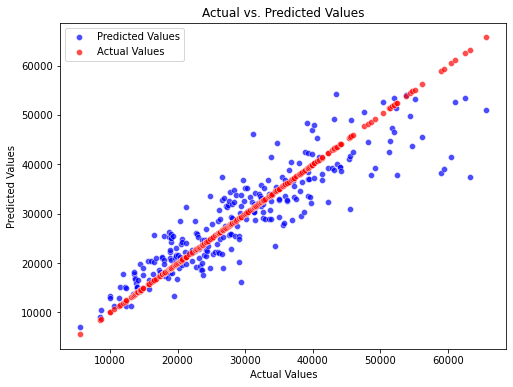

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort the actual and predicted values for the line plot
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = y_pred_rf[sorted_indices]

# Ensure both arrays have the same length
min_len = min(len(sorted_actual), len(sorted_predicted))
sorted_actual = sorted_actual[:min_len]
sorted_predicted = sorted_predicted[:min_len]

# Create a DataFrame for the scatter plot
data = pd.DataFrame({
    'Actual Values': sorted_actual,
    'Predicted Values': sorted_predicted
})

# Plot the actual versus predicted values using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Values', y='Predicted Values', data=data, color='blue', alpha=0.7)
sns.scatterplot(x=sorted_actual, y=sorted_actual, color='red', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(labels=['Predicted Values', 'Actual Values'], loc='upper left')
plt.show()

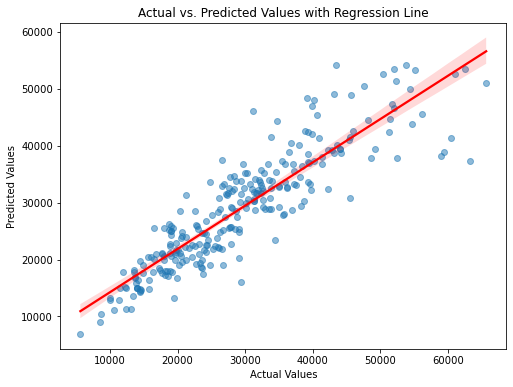

In [39]:
# Plot the regression line along with the actual and predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()

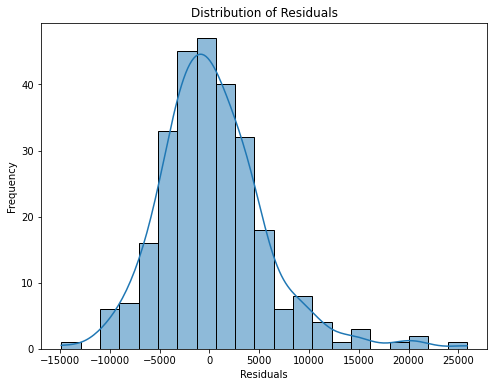

In [40]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

#  Feature Scaling (Normalize the data)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

#  Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

# 5. Create the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# 6. Initialize Grid Search with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# 7. Perform Grid Search on the training data
grid_search.fit(X_train_normalized, y_train)

# 8. Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 9. Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_normalized)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print("Best MAE on Test Set:", mae_best)
print("Best R-squared on Test Set:", r2_best)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best MAE on Test Set: 3915.2778597785973
Best R-squared on Test Set: 0.7960845201932628


### Random Forest using only a selected features

In [42]:
selected_features = ['ratedHorsePower_value', 'powerDIN_value', 'co2_value', 'year','critAir']

In [43]:
# Define the features (X) and target (y)
target = 'Prix'
features = selected_features

X = df[features]
y = df[target]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Model Training
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)

# Model Evaluation
y_pred = model1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 4086.217979761116
Mean Squared Error: 32759861.791027702
R-squared: 0.7699596260065077


### Changing hyperparameters

In [45]:
from sklearn.model_selection import  GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Initialize Grid Search with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Perform Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best MAE on Test Set:", mae)
print("R-squared on Test Set:", r2)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best MAE on Test Set: 4109.632257739608
R-squared on Test Set: 0.7701906387525453


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': randint(100, 500),  # Randomly sample between 100 and 500
    'max_depth': [None, 10, 20, 30],  # Randomly sample from the provided values
    'min_samples_split': randint(2, 20),  # Randomly sample between 2 and 20
    'min_samples_leaf': randint(1, 10)  # Randomly sample between 1 and 10
}

# Initialize Randomized Search with the Random Forest model and parameter distribution
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, n_iter=10, n_jobs=-1,
                                   scoring='neg_mean_absolute_error', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_random = best_model_random.predict(X_test)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print("Best Hyperparameters (Randomized):", best_params_random)
print("Best MAE on Test Set (Randomized):", mae_random)
print("R-squared on Test Set (Randomized):", r2_random)

Best Hyperparameters (Randomized): {'max_depth': 20, 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 187}
Best MAE on Test Set (Randomized): 4349.206760635928
R-squared on Test Set (Randomized): 0.7509629090743738


## XGBoost using all features : 


In [47]:
#pip install xgboost

In [48]:
from xgboost import XGBRegressor

In [49]:
# Create the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the metrics (MAE and R2 score)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model MAE:", mae_xgb)
print("XGBoost Model R-squared:", r2_xgb)

XGBoost Model MAE: 4366.544548907403
XGBoost Model R-squared: 0.7384743001422346


In [50]:
# Create the XGBoost regressor with custom hyperparameters
xgb_model = XGBRegressor(
    learning_rate=0.1,    # Learning rate (also known as eta)
    n_estimators=100,     # Number of boosting rounds or trees
    max_depth=6,          # Maximum depth of each tree
    min_child_weight=1,   # Minimum sum of instance weight (Hessian) needed in a child
    gamma=0,              # Minimum loss reduction required to make a further partition on a leaf node
    subsample=1.0,        # Subsample ratio of the training instance
    colsample_bytree=1.0, # Subsample ratio of columns when constructing each tree
    random_state=42       # Random seed for reproducibility
)

# Train the XGBoost model with the new hyperparameters
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the metrics (MAE and R2 score)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model MAE:", mae_xgb)
print("XGBoost Model R-squared:", r2_xgb)

XGBoost Model MAE: 4194.740250590982
XGBoost Model R-squared: 0.7616487893047997


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from xgboost import XGBRegressor

# Define the parameter distribution for Randomized Search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],                # Try different learning rates
    'n_estimators': randint(100, 500),                # Randomly sample between 100 and 500
    'max_depth': [3, 5, 7, 10],                       # Try different maximum depths
    'min_child_weight': [1, 3, 5],                     # Try different min_child_weights
    'gamma': [0, 0.1, 0.2],                           # Try different gamma values
    'subsample': [0.8, 0.9, 1.0],                     # Try different subsample ratios
    'colsample_bytree': [0.8, 0.9, 1.0],              # Try different colsample_bytree ratios
    'random_state': [42]
}

# Create the XGBoost regressor
xgb_model = XGBRegressor()

# Initialize Randomized Search with the XGBoost model and parameter distribution
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, cv=5,
                                   n_iter=10, n_jobs=-1, scoring='r2', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_xgb_random = best_model_random.predict(X_test)
mae_xgb_random = mean_absolute_error(y_test, y_pred_xgb_random)
r2_xgb_random = r2_score(y_test, y_pred_xgb_random)

print("Best Hyperparameters (Randomized):", best_params_random)
print("XGBoost Model MAE (Randomized):", mae_xgb_random)
print("XGBoost Model R-squared (Randomized):", r2_xgb_random)

Best Hyperparameters (Randomized): {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 393, 'random_state': 42, 'subsample': 0.9}
XGBoost Model MAE (Randomized): 4203.153749135147
XGBoost Model R-squared (Randomized): 0.769440468907724


In [52]:
# Calculate Mean Absolute Percentage Error (MAPE) manually
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Calculate different evaluation metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)  # Implement your custom MAPE function
medae = median_absolute_error(y_test, y_pred_xgb)
evs = explained_variance_score(y_test, y_pred_xgb)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Median Absolute Error:", medae)
print("Explained Variance Score:", evs)

MAE: 4194.740250590982
MSE: 33943401.25842335
RMSE: 5826.096571326581
MAPE: 14.85814584052381
Median Absolute Error: 2957.939453125
Explained Variance Score: 0.7617775475936092


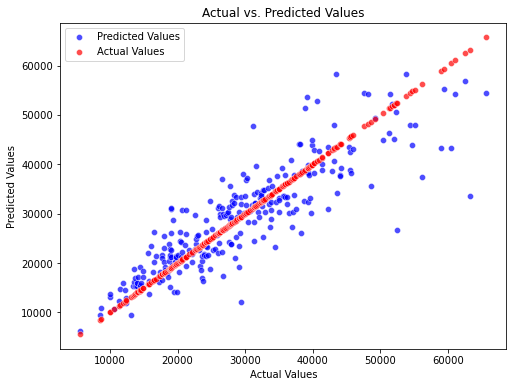

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort the actual and predicted values for the line plot
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = y_pred_xgb[sorted_indices]

# Ensure both arrays have the same length
min_len = min(len(sorted_actual), len(sorted_predicted))
sorted_actual = sorted_actual[:min_len]
sorted_predicted = sorted_predicted[:min_len]

# Create a DataFrame for the scatter plot
data = pd.DataFrame({
    'Actual Values': sorted_actual,
    'Predicted Values': sorted_predicted
})

# Plot the actual versus predicted values using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Values', y='Predicted Values', data=data, color='blue', alpha=0.7)
sns.scatterplot(x=sorted_actual, y=sorted_actual, color='red', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(labels=['Predicted Values', 'Actual Values'], loc='upper left')
plt.show()

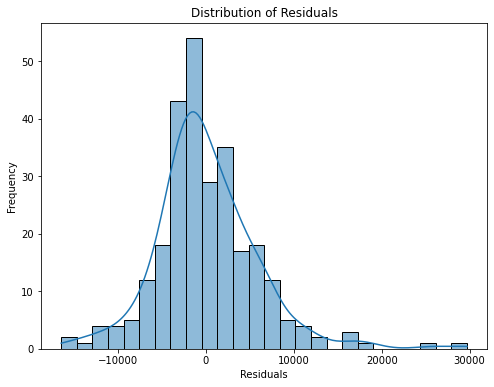

In [55]:
# Calculate residuals
residuals = y_test - y_pred_xgb

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

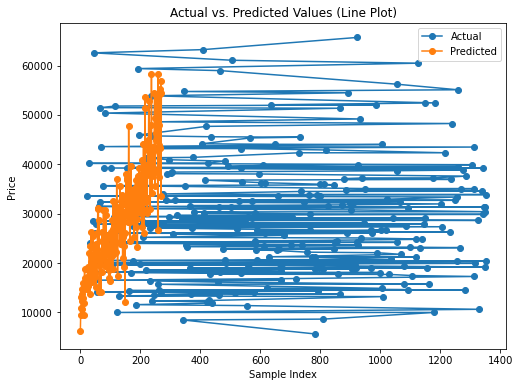

In [56]:
# Sort the actual and predicted values for the line plot
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = y_pred_xgb[sorted_indices]

# Plot the actual and predicted values using a line plot
plt.figure(figsize=(8, 6))
plt.plot(sorted_actual, label='Actual', marker='o')
plt.plot(sorted_predicted, label='Predicted', marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Values (Line Plot)")
plt.legend()
plt.show()

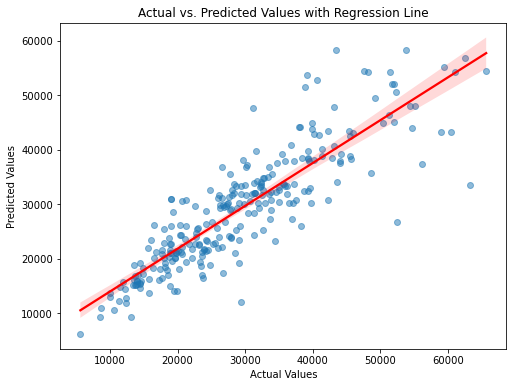

In [57]:
# Plot the regression line along with the actual and predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_xgb, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()

##  XGBoost model using a selected features

In [58]:
selected_features = ['ratedHorsePower_value', 'powerDIN_value', 'co2_value','year','critAir','mileage_value']

In [59]:
# Define the features (X) and target (y)
target = 'Prix'
features = selected_features

X = df[features]
y = df[target]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from xgboost import XGBRegressor

# Create the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the metrics (MAE and R2 score)
mae_xgb1 = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb1 = r2_score(y_test, y_pred_xgb)

print("XGBoost Model MAE:", mae_xgb1)
print("XGBoost Model R-squared:", r2_xgb1)

XGBoost Model MAE: 3985.9673338041976
XGBoost Model R-squared: 0.7791142783573547


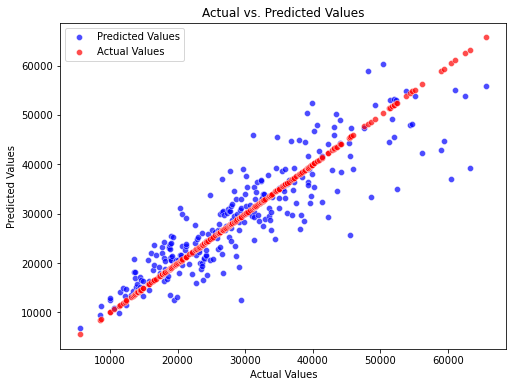

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort the actual and predicted values for the line plot
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = y_pred_xgb[sorted_indices]

# Ensure both arrays have the same length
min_len = min(len(sorted_actual), len(sorted_predicted))
sorted_actual = sorted_actual[:min_len]
sorted_predicted = sorted_predicted[:min_len]

# Create a DataFrame for the scatter plot
data = pd.DataFrame({
    'Actual Values': sorted_actual,
    'Predicted Values': sorted_predicted
})

# Plot the actual versus predicted values using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Values', y='Predicted Values', data=data, color='blue', alpha=0.7)
sns.scatterplot(x=sorted_actual, y=sorted_actual, color='red', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(labels=['Predicted Values', 'Actual Values'], loc='upper left')
plt.show()

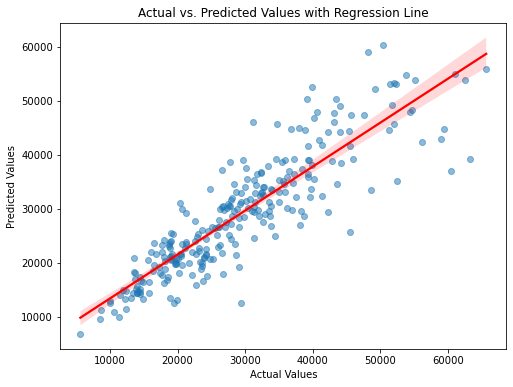

In [62]:
# Plot the regression line along with the actual and predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_xgb, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()

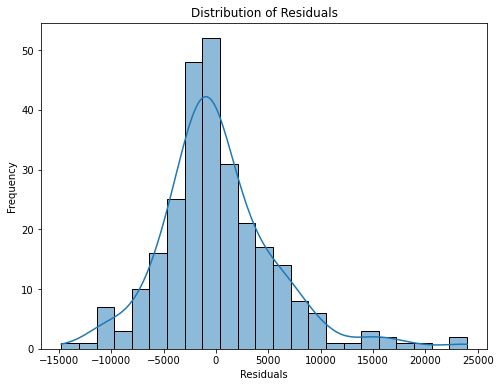

In [63]:
# Calculate residuals
residuals = y_test - y_pred_xgb

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

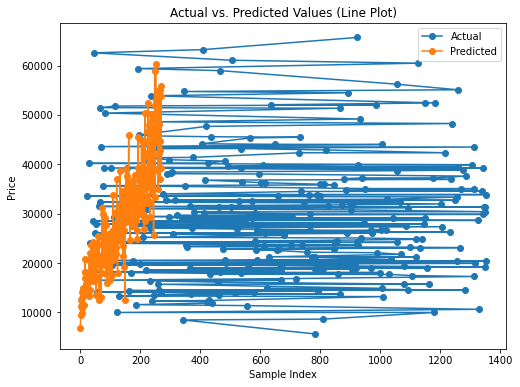

In [64]:
# Sort the actual and predicted values for the line plot
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = y_pred_xgb[sorted_indices]

# Plot the actual and predicted values using a line plot
plt.figure(figsize=(8, 6))
plt.plot(sorted_actual, label='Actual', marker='o')
plt.plot(sorted_predicted, label='Predicted', marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Values (Line Plot)")
plt.legend()
plt.show()

### SVM Model

In [65]:
from sklearn.svm import SVR

# Create the Support Vector Regression (SVR) model
svm_model = SVR(kernel='linear')  # You can choose the kernel type ('linear', 'rbf', etc.)

# Train the SVR model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate the metrics (MAE and R2 score)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Model MAE:", mae_svm)
print("SVM Model R-squared:", r2_svm)

SVM Model MAE: 9502.350209089602
SVM Model R-squared: -0.04031887681528401


### Régression Linéaire Multiple 

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Création de l'objet de régression linéaire
reg = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement avec la fonction fit()
reg.fit(X_train[['co2_value', 'ratedHorsePower_value']], y_train)

# Prédiction des prix sur l'ensemble de test avec la fonction predict()
y_pred = reg.predict(X_test[['co2_value','ratedHorsePower_value']])

# Calcul du coefficient de détermination R² avec la fonction r2_score
r2 = r2_score(y_test, y_pred)

print(f"Coefficient de détermination R² : {r2:.2f}")

Coefficient de détermination R² : 0.34


C:\Users\Joan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


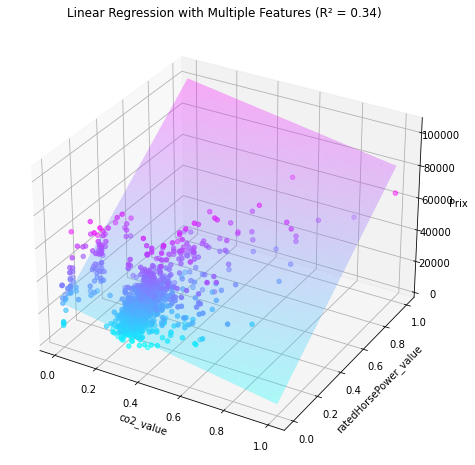

In [69]:
# Create a 3D plot of the data and regression line
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the training data
ax.scatter (X_train['co2_value'], X_train['ratedHorsePower_value'], y_train, c=y_train, cmap='cool', label='Données d\'entraînement')

# Plot the test data
ax.scatter(X_test['co2_value'], X_test['ratedHorsePower_value'], y_test, c=y_test, cmap='cool', alpha=0.5, label='Données de test')

# Create a mesh grid of the feature space to plot the regression surface
x_surf, y_surf = np.meshgrid(np.linspace(X_train['co2_value'].min(), X_train['co2_value'].max(), 100), 
                             np.linspace(X_train['ratedHorsePower_value'].min(), X_train['ratedHorsePower_value'].max(), 100))
#flatten() pour remplacer ravel
#z_surf = reg.predict(pd.DataFrame({'length': x_surf.ravel(), 'width': y_surf.ravel(), 'width': np.zeros_like(x_surf.ravel())}))
z_surf = reg.predict(np.array([x_surf.flatten(), y_surf.flatten()]).T).reshape(x_surf.shape)
# Plot the regression surface
ax.plot_surface(x_surf, y_surf, z_surf.reshape(x_surf.shape), cmap='cool', alpha=0.3, label='Modèle de régression')

# Set the axis labels and title
ax.set_xlabel('co2_value')
ax.set_ylabel('ratedHorsePower_value')
ax.set_zlabel('Prix')
ax.set_title(f'Linear Regression with Multiple Features (R² = {r2:.2f})')


plt.show()
